1.Import Necessary Libraries

In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt


2.Load the Dataset

In [5]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('/content/housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


3.Preprocess the Data

In [6]:
# Handling missing values
data = data.dropna()
X = data.drop('MEDV', axis=1)
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [8]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 10.416078431372549
R-squared: 0.8579634380978161


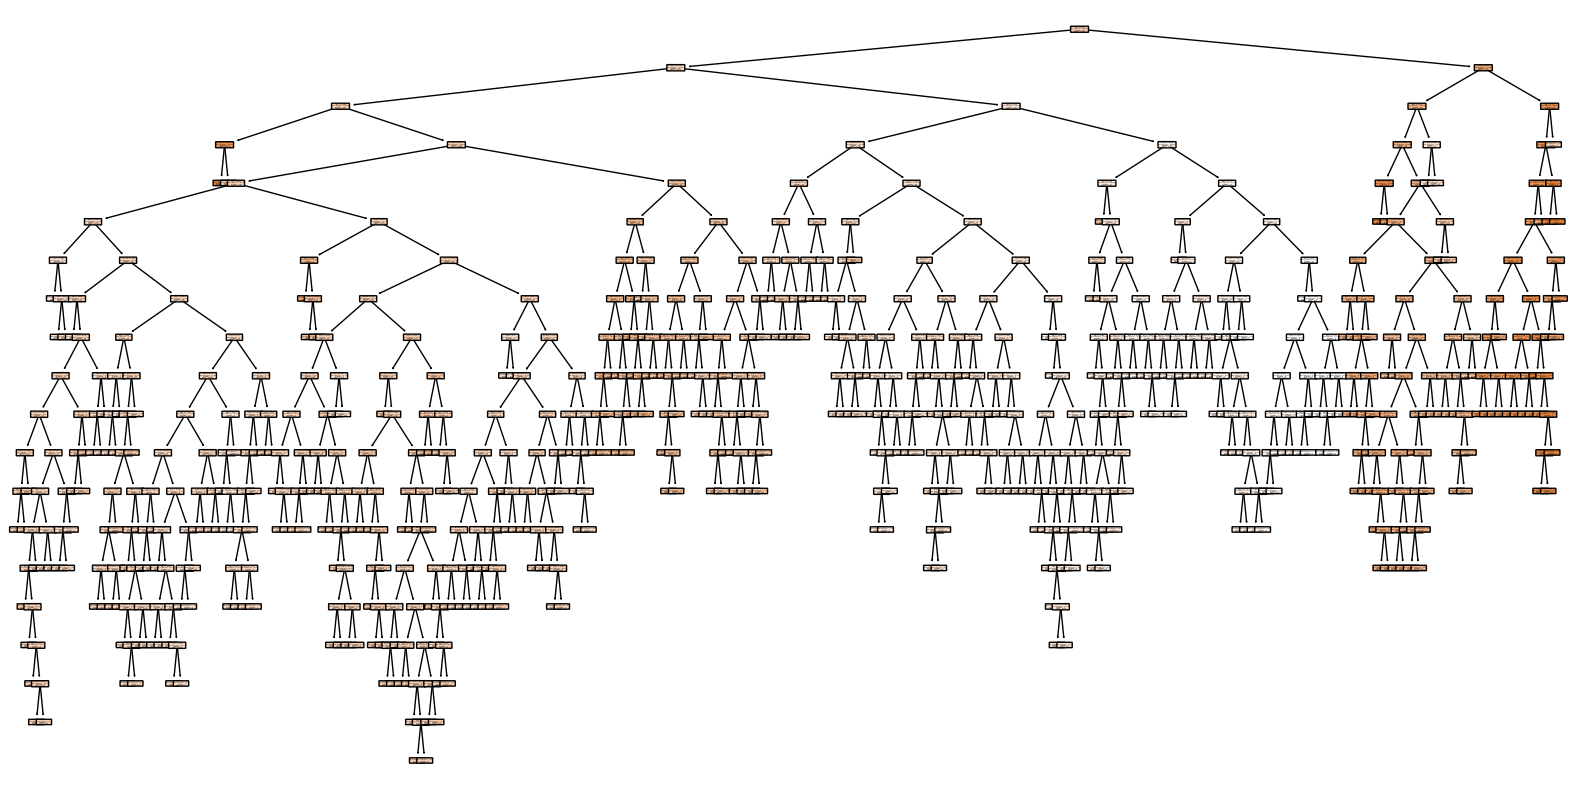

In [9]:
plt.figure(figsize=(20,10))
plot_tree(regressor, filled=True, feature_names=X.columns, rounded=True)
plt.show()


**Decision Tree Regression - Medical Cost**

In [10]:
import pandas as pd
from pandas import read_csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt


In [11]:
data = read_csv('/content/insurance.csv')
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
# Define the features and target variable
X = data.drop('charges', axis=1)
y = data['charges']
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_transformed = pipeline.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.33, random_state=42)


In [13]:
# Initialize the regressor
regressor = DecisionTreeRegressor(random_state=42)


In [14]:
regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [15]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 41484193.482994996
R-squared: 0.7169177325170792


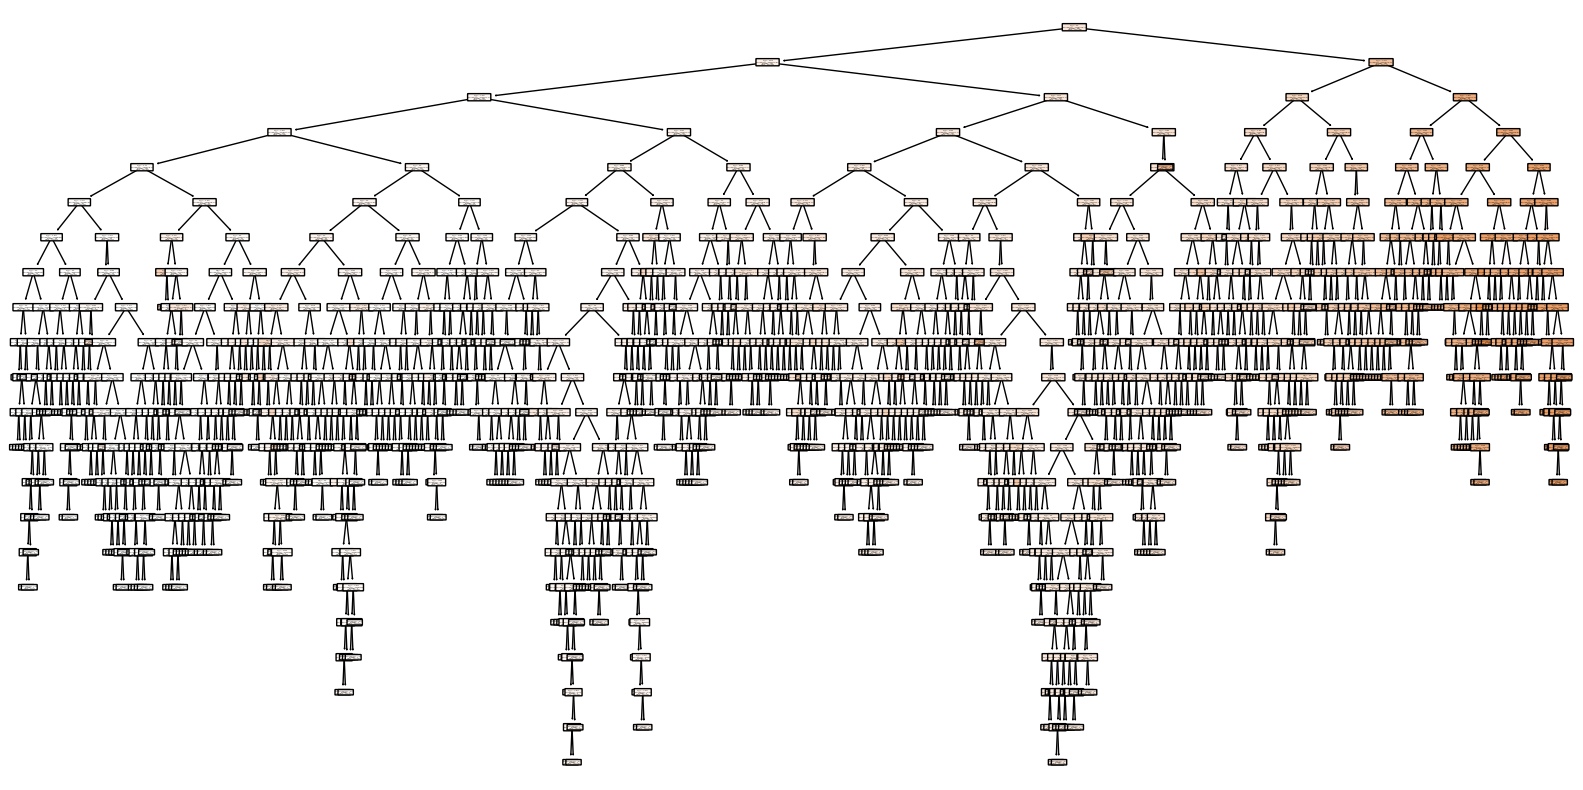

In [16]:
plt.figure(figsize=(20,10))
plot_tree(regressor, filled=True, rounded=True)
plt.show()
